In [24]:
import pandas as pd
import numpy as np
import seaborn as sns


### MODEL TRAINING


In [25]:
df_copy=pd.read_csv('../datasets/algerian_cleaned_dataset.csv')
df=df_copy

In [ ]:
# independent and dependent features
X=df.drop(['FWI'],axis=1)
y=df['FWI']


In [27]:
def multicollinearity(dataset,threshold):
    matrix_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                matrix_corr.add(colname)
    return matrix_corr

In [28]:
bekaar=multicollinearity(X,0.85)

In [29]:
X.drop(bekaar,axis=1,inplace=True)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
X_train.shape

(182, 9)

In [33]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [37]:
linreg.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=linreg.predict(X_test)

In [39]:
import matplotlib.pyplot as plt

Score 0.9847657384266951
MAE 0.546823646525


Text(0.5, 1.0, 'Linear-Regression')

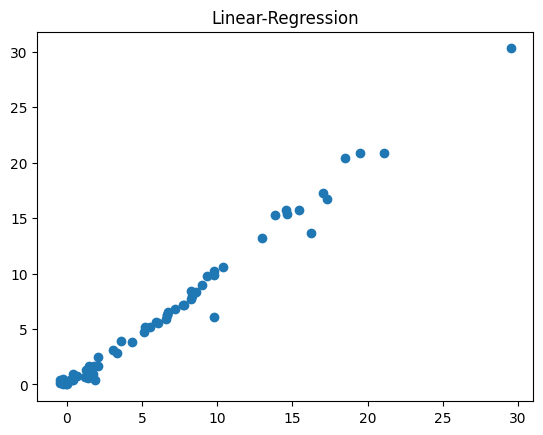

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Score",score)
print("MAE",mae)
plt.scatter(y_pred,y_test)
plt.title("Linear-Regression")

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

Mean absolute error: 0.546823646525
Lasso_score 0.9492020263112388


Text(0.5, 1.0, 'Lasso-Analysis')

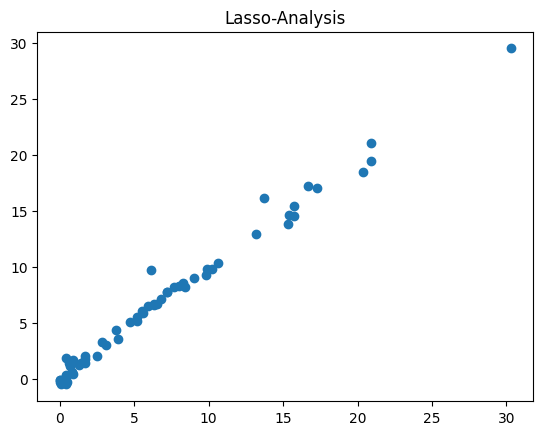

In [42]:
# L1 regilazisation
lasso=Lasso()
lasso.fit(X_train,y_train)
y_predict=lasso.predict(X_test)
lasso_score=r2_score(y_test,y_predict)
mae_lasso=mean_absolute_error(y_test,y_pred)
print("Mean absolute error:",mae_lasso)
print("Lasso_score",lasso_score)
plt.scatter(y_test,y_pred)
plt.title("Lasso-Analysis")

Mean absolute error: 0.546823646525
Lasso_score 0.9492020263112388
7.156043956043957


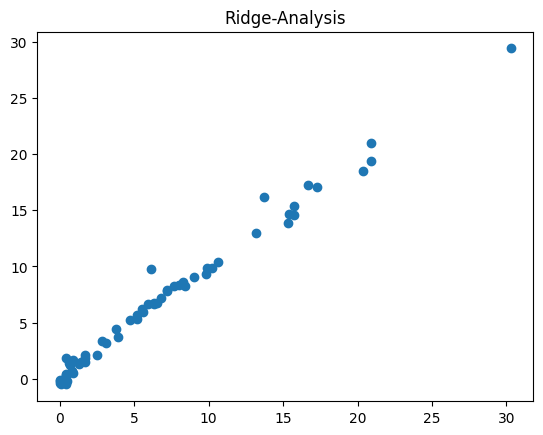

In [43]:
# L2 regularization
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_ridge_predict=ridge.predict(X_test)
ridge_score=r2_score(y_test,y_ridge_predict)
mae_ridge=mean_absolute_error(y_test,y_ridge_predict)
print("Mean absolute error:",mae_lasso)
print("Lasso_score",lasso_score)
plt.scatter(y_test,y_ridge_predict)
plt.title("Ridge-Analysis")
print(ridge.intercept_)

Elastic_Net_Score 0.8753460589519703
Mean_absolute_error 1.8822353634896
7.156043956043956


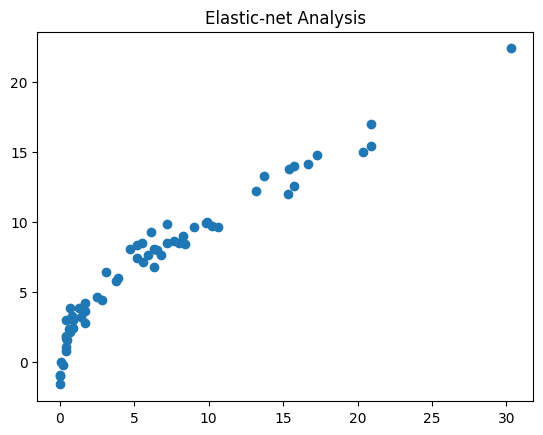

In [44]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet()
elastic_net.fit(X_train,y_train)
y_elastic_predict=elastic_net.predict(X_test)
elastic_net_score=r2_score(y_test,y_elastic_predict)
mae_elastic=mean_absolute_error(y_test,y_elastic_predict)
print("Elastic_Net_Score",elastic_net_score)
print("Mean_absolute_error",mae_elastic)
plt.scatter(y_test,y_elastic_predict)
plt.title('Elastic-net Analysis')
print(elastic_net.intercept_)


alpha 0.05725391318234405
score 0.9820946715928275
lassocv [-0.         -0.          0.          0.         -0.40063928  3.60177292
  4.7999393   0.16408964 -0.3022766 ]
ridge [-0.02692577 -0.20519212  0.02554428 -0.04069202 -0.78583006  3.68286744
  4.74488835  0.43423672 -0.38466214]
lasso [ 0.         -0.          0.         -0.          0.          2.99025157
  4.00824747  0.         -0.        ]


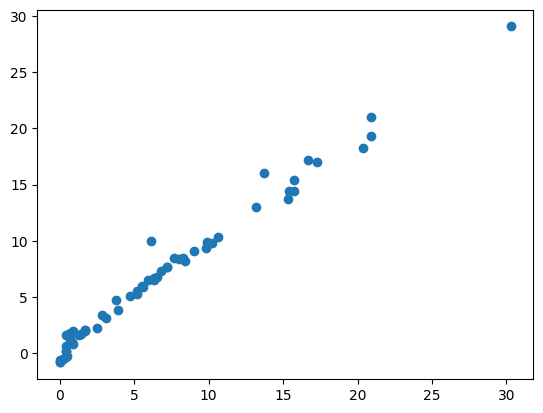

In [45]:
from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(X_train,y_train)
y_lassocv_pred=lasso_cv.predict(X_test)
score_lasso_cv=r2_score(y_test,y_lassocv_pred)
plt.scatter(y_test,y_lassocv_pred)
print("alpha",lasso_cv.alpha_)
print("score",score_lasso_cv)
print("lassocv",lasso_cv.coef_)
print("ridge",ridge.coef_)
print("lasso",lasso.coef_)

In [46]:
lasso_cv.intercept_

np.float64(7.156043956043957)

In [47]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv=ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train,y_train)
print(elastic_net_cv.coef_)
print(elastic_net_cv.intercept_)
print(r2_score(y_test,elastic_net_cv.predict(X_test)))

[-0.         -0.19081149  0.05486916 -0.         -0.50794865  3.59828374
  4.50431349  0.41864659 -0.32815292]
7.156043956043957
0.9814217587854941


In [48]:
print(elastic_net_cv.alpha_)

0.04311146156383888


In [49]:
elastic_net_cv.alphas_.shape

(100,)

In [50]:
X_train.shape

(182, 9)

In [51]:
import pickle
pickle.dump(ridge,open('project.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [60]:
X.columns



Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')